#### Test

In [1]:
%%capture

%config InlineBackend.figure_formats = ['svg']

pwd = %pwd
pwd += '/..'

%env TEXINPUTS=$pwd
%env MATPLOTLIBRC=$pwd/matplotlibrc

%matplotlib inline

import matplotlib as mpl

mpl.rc_file('../matplotlibrc')

mpl.use('module://matplotlib_inline.backend_inline')
mpl.style.use('default')

from matplotlib.backends.backend_pgf import FigureCanvasPgf
mpl.backend_bases.register_backend('pdf', FigureCanvasPgf)

import numpy as np
import matplotlib.pyplot as plt
import uncertainties.unumpy as unp
from uncertainties.unumpy import nominal_values as noms, std_devs as stds, uarray as uar

s = np.array([-1e4, 1e4])

Nulleffekt

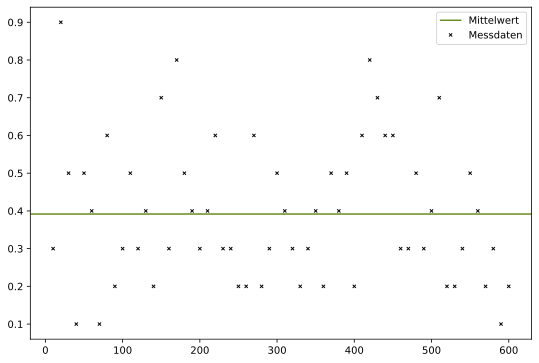

0.39+/-0.19


In [2]:
# intervall
t_u = 10

# einlesen
N_u = np.genfromtxt('data/null_10.txt', unpack=True)

# normieren
N_u /= t_u

# zeitschritte
t_u = np.arange(0, t_u * len(N_u), t_u) + t_u

# dimension
plt.figure(figsize=(9, 6))

# grenzen
plt.plot(t_u, N_u, 'kx', ms=0)
x_u = plt.xlim()
y_u = plt.ylim()
plt.xlim(x_u)
plt.ylim(y_u)

# mittelwert
mN_u = uar(np.mean(N_u), np.std(N_u))
plt.plot(s, noms(mN_u) * s / s, c='olivedrab', label='Mittelwert')

# messpunkte
plt.plot(t_u, N_u, 'kx', ms=3.21, label='Messdaten')

# anzeigen
plt.legend()
plt.show()
print(mN_u)

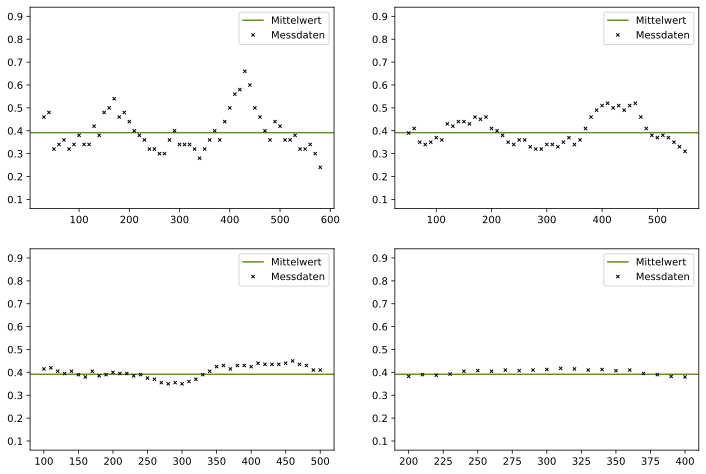

In [3]:
# rolling average
def smooth(p : int, t, N):
    return t[p-int(p/2)-1:-p+int(p/2)+p%2], np.convolve(N, np.ones(p)/p, mode='valid')

plt.figure(figsize=(12, 8))

plt.subplot(221)
t_u_5, N_u_5 = smooth(5, t_u, N_u)
plt.plot(t_u_5, N_u_5, 'kx', ms=0)
plt.xlim(plt.xlim())
plt.ylim(y_u)
plt.plot(s, noms(mN_u) * s / s, c='olivedrab', label='Mittelwert')
plt.plot(t_u_5, N_u_5, 'kx', ms=3.21, label='Messdaten')
plt.ylim(y_u)
plt.legend()

plt.subplot(222)
t_u_10, N_u_10 = smooth(10, t_u, N_u)
plt.plot(t_u_10, N_u_10, 'kx', ms=0)
plt.xlim(plt.xlim())
plt.ylim(y_u)
plt.plot(s, noms(mN_u) * s / s, c='olivedrab', label='Mittelwert')
plt.plot(t_u_10, N_u_10, 'kx', ms=3.21, label='Messdaten')
plt.ylim(y_u)
plt.legend()

plt.subplot(223)
t_u_20, N_u_20 = smooth(20, t_u, N_u)
plt.plot(t_u_20, N_u_20, 'kx', ms=0)
plt.xlim(plt.xlim())
plt.ylim(y_u)
plt.plot(s, noms(mN_u) * s / s, c='olivedrab', label='Mittelwert')
plt.plot(t_u_20, N_u_20, 'kx', ms=3.21, label='Messdaten')
plt.ylim(y_u)
plt.legend()

plt.subplot(224)
t_u_40, N_u_40 = smooth(40, t_u, N_u)
plt.plot(t_u_40, N_u_40, 'kx', ms=0)
plt.xlim(plt.xlim())
plt.ylim(y_u)
plt.plot(s, noms(mN_u) * s / s, c='olivedrab', label='Mittelwert')
plt.plot(t_u_40, N_u_40, 'kx', ms=3.21, label='Messdaten')
plt.legend()

plt.show()

Vanadium

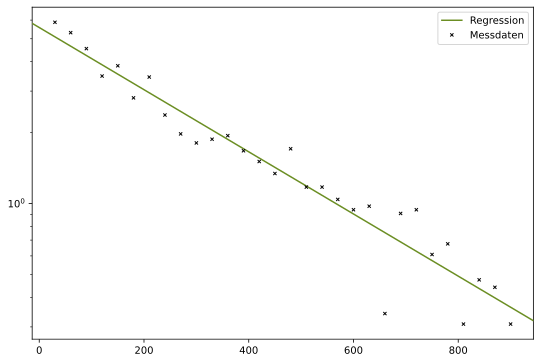

[-0.003034714708558752+/-0.0001635483613067968
 1.7192292799320785+/-0.08710389806887635]


In [4]:
# intervall
t = 30

# einlesen
N = np.genfromtxt('data/v_30.txt', unpack=True)

# normieren
N /= t

# bereinigen
N = N - mN_u

# zeitschritte
t = np.arange(0, t * len(N), t) + t

# dimension
plt.figure(figsize=(9, 6))

# skala konfigurieren
ax1 = plt.subplot(111)
plt.plot(t, noms(N), 'kx', ms=0)
ax1.set(xscale='linear', yscale='log')
ax2 = ax1.twinx()
ax2.axis('off')

# grenzen
plt.plot(t, np.log(noms(N)), 'kx', ms=0)
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())

# regression
par, cov = np.polyfit(t, np.log(noms(N)), 1, cov=True)
err = np.sqrt(np.diag(cov))
rN = uar(par, err)
plt.plot(s, par[0] * s + par[1], c='olivedrab', label='Regression')

# messpunkte
plt.plot(t, np.log(noms(N)), 'kx', ms=3.21, label='Messdaten')

# anzeigen
plt.legend()
plt.show()
print(rN)

Rhodium

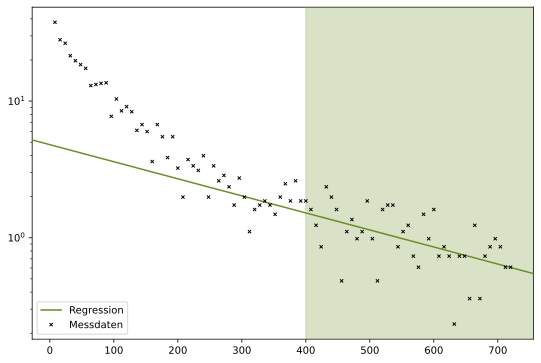

[-0.0028739283393750064+/-0.0007237821325485451
 1.567356649177567+/-0.4110674728069607]


In [5]:
# intervall
t_1 = 8

# einlesen
N_1 = np.genfromtxt('data/rh_8.txt', unpack=True)

# normieren
N_1 /= t_1

# bereinigen
N_1 = N_1 - mN_u

# zeitschritte
t_1 = np.arange(0, t_1 * len(N_1), t_1) + t_1

# dimension
plt.figure(figsize=(9, 6))

# skala konfigurieren
ax1 = plt.subplot(111)
plt.plot(t_1, noms(N_1), 'kx', ms=0)
ax1.set(xscale='linear', yscale='log')
ax2 = ax1.twinx()
ax2.axis('off')

# grenzen
plt.plot(t_1, np.log(noms(N_1)), 'kx', ms=0)
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())

# markierung
plt.axvspan(400, s[1], color='olivedrab', alpha=0.25)

# regression
rN_1, rt_1 = N_1[t_1 >= 400], t_1[t_1 >= 400]
par_1, cov_1 = np.polyfit(rt_1, np.log(noms(rN_1)), 1, cov=True)
err_1 = np.sqrt(np.diag(cov_1))
rN_1 = uar(par_1, err_1)
plt.plot(s, par_1[0] * s + par_1[1], c='olivedrab', label='Regression')

# messpunkte
plt.plot(t_1, np.log(noms(N_1)), 'kx', ms=3.21, label='Messdaten')

# anzeigen
plt.legend()
plt.show()
print(rN_1)

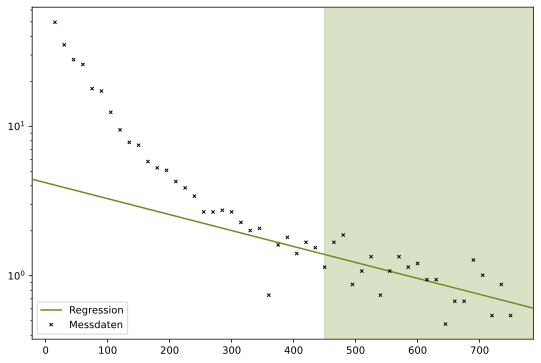

[-0.002457109323782711+/-0.0007059225389253712
 1.4332890769382627+/-0.42837925002509936]


In [6]:
# intervall
t_2 = 15

# einlesen
N_2 = np.genfromtxt('data/rh_15.txt', unpack=True)

# normieren
N_2 /= t_2

# bereinigen
N_2 = N_2 - mN_u

# zeitschritte
t_2 = np.arange(0, t_2 * len(N_2), t_2) + t_2

# dimension
plt.figure(figsize=(9, 6))

# skala konfigurieren
ax1 = plt.subplot(111)
plt.plot(t_2, noms(N_2), 'kx', ms=0)
ax1.set(xscale='linear', yscale='log')
ax2 = ax1.twinx()
ax2.axis('off')

# grenzen
plt.plot(t_2, np.log(noms(N_2)), 'kx', ms=0)
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())

# markierung
plt.axvspan(450, s[1], color='olivedrab', alpha=0.25)

# regression
rN_2, rt_2 = N_2[t_2 >= 450], t_2[t_2 >= 450]
par_2, cov_2 = np.polyfit(rt_2, np.log(noms(rN_2)), 1, cov=True)
err_2 = np.sqrt(np.diag(cov_2))
rN_2 = uar(par_2, err_2)
plt.plot(s, par_2[0] * s + par_2[1], c='olivedrab', label='Regression')

# messpunkte
plt.plot(t_2, np.log(noms(N_2)), 'kx', ms=3.21, label='Messdaten')

# anzeigen
plt.legend()
plt.show()
print(rN_2)

Regression für Rhodiumgemisch vervollständigen, Achsenbeschriftung einfügen